<a href="https://www.kaggle.com/code/aneevinay/college-students-placement-ml?scriptVersionId=256405137" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/college-student-placement-factors-dataset/college_student_placement_dataset.csv


# Load Packages

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay

import warnings
warnings.filterwarnings('ignore')

# Read The Data

In [3]:
df = pd.read_csv('/kaggle/input/college-student-placement-factors-dataset/college_student_placement_dataset.csv')

# Check the Data

In [4]:
df.shape

(10000, 10)

## Glimpse the Data

In [5]:
df.head()

,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,CLG0030,107,6.61,6.28,8,No,8,8,4,No
1,CLG0061,97,5.52,5.37,8,No,7,8,0,No
2,CLG0036,109,5.36,5.83,9,No,3,1,1,No
3,CLG0055,122,5.47,5.75,6,Yes,1,6,1,No
4,CLG0004,96,7.91,7.69,7,No,8,10,2,No


In [6]:
df.describe()

,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Extra_Curricular_Score,Communication_Skills,Projects_Completed
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,99.471800,7.535673,7.532379,5.546400,4.970900,5.561800,2.513400
std,15.053101,1.447519,1.470141,2.873477,3.160103,2.900866,1.715959
min,41.000000,5.000000,4.540000,1.000000,0.000000,1.000000,0.000000
25%,89.000000,6.290000,6.290000,3.000000,2.000000,3.000000,1.000000
50%,99.000000,7.560000,7.550000,6.000000,5.000000,6.000000,3.000000
75%,110.000000,8.790000,8.770000,8.000000,8.000000,8.000000,4.000000
max,158.000000,10.000000,10.460000,10.000000,10.000000,10.000000,5.000000


## Check Missing Values

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   College_ID              10000 non-null  object 
 1   IQ                      10000 non-null  int64  
 2   Prev_Sem_Result         10000 non-null  float64
 3   CGPA                    10000 non-null  float64
 4   Academic_Performance    10000 non-null  int64  
 5   Internship_Experience   10000 non-null  object 
 6   Extra_Curricular_Score  10000 non-null  int64  
 7   Communication_Skills    10000 non-null  int64  
 8   Projects_Completed      10000 non-null  int64  
 9   Placement               10000 non-null  object 
dtypes: float64(2), int64(5), object(3)
memory usage: 781.4+ KB


There is no missing values

## Data Unbalance

In [8]:
df['Placement'].value_counts()

Placement
No     8341
Yes    1659
Name: count, dtype: int64

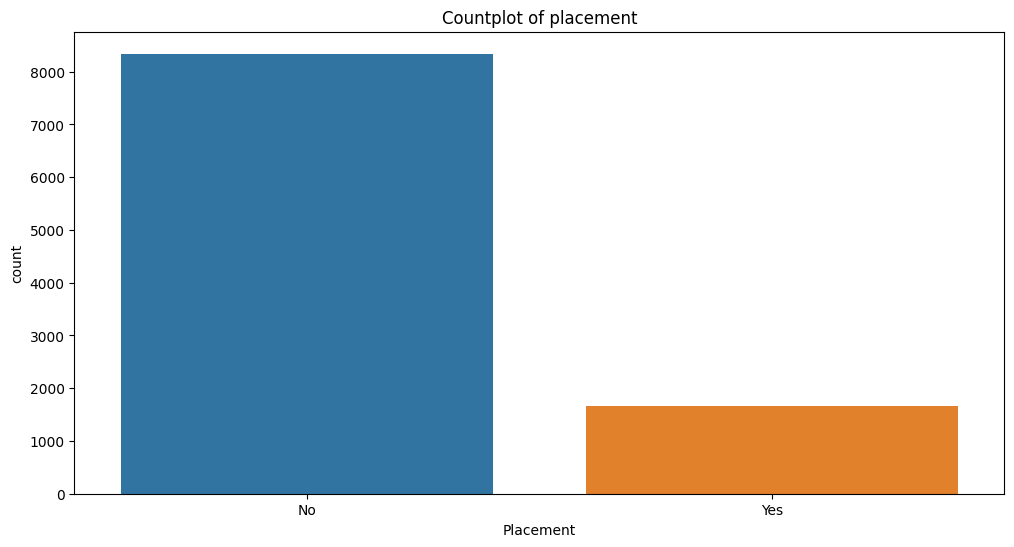

In [9]:
plt.figure(figsize=(12,6))
sns.countplot(x='Placement',data=df)
plt.title('Countplot of placement')
plt.show()

only small percentage of students got placement. All others are rejected .That is Data is unbalanced and it naturally tends rejected case

# Data Exploration

## Data Distributions

### Numerical data


🔢 Value counts for 'IQ':
IQ
41     1
42     1
44     1
45     1
51     3
      ..
148    1
150    1
152    1
157    1
158    1
Name: count, Length: 104, dtype: int64


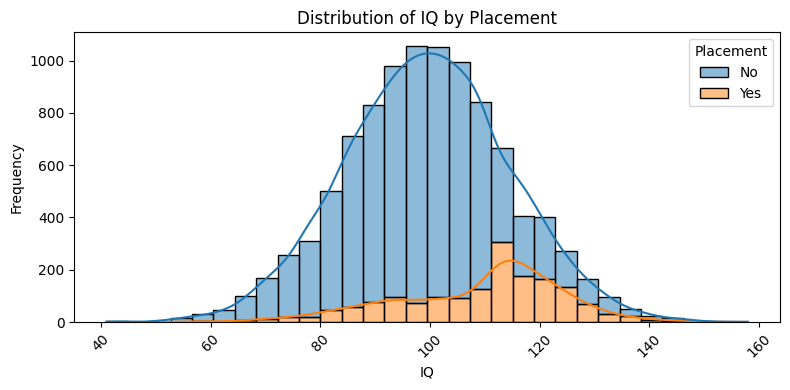


🔢 Value counts for 'Prev_Sem_Result':
Prev_Sem_Result
5.00     10
5.01     15
5.02     21
5.03     12
5.04     16
         ..
9.96     15
9.97     20
9.98     28
9.99     30
10.00     8
Name: count, Length: 501, dtype: int64


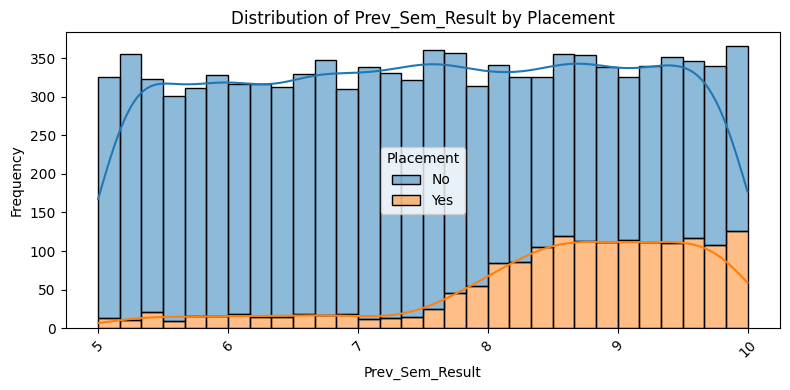


🔢 Value counts for 'CGPA':
CGPA
4.54     1
4.56     1
4.57     1
4.58     1
4.59     3
        ..
10.41    1
10.42    2
10.44    1
10.45    2
10.46    2
Name: count, Length: 590, dtype: int64


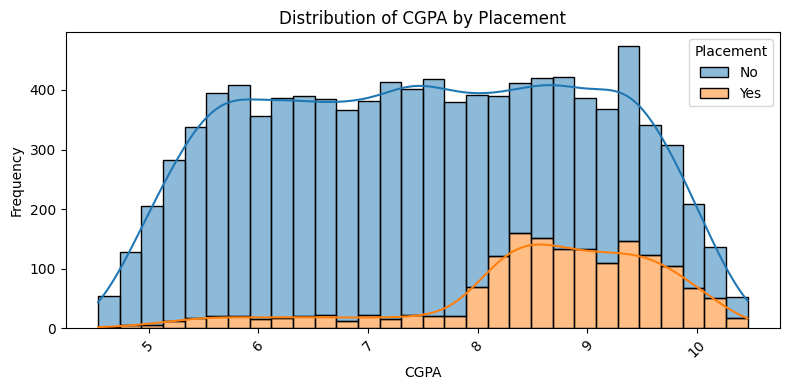


🔢 Value counts for 'Academic_Performance':
Academic_Performance
1      963
2      995
3      991
4     1004
5      974
6      990
7     1027
8     1025
9      987
10    1044
Name: count, dtype: int64


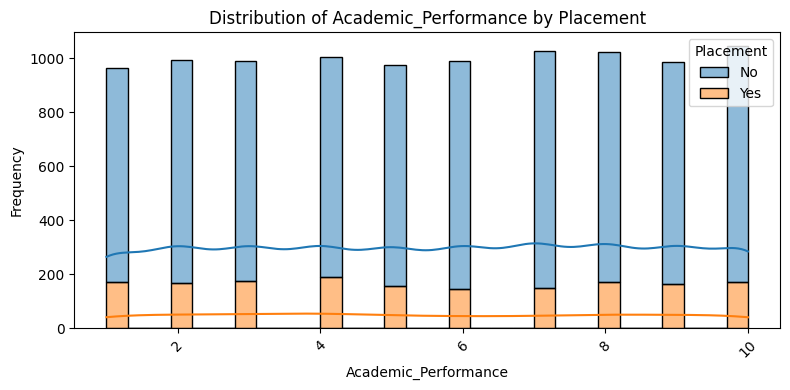


🔢 Value counts for 'Extra_Curricular_Score':
Extra_Curricular_Score
0     929
1     903
2     899
3     965
4     889
5     928
6     879
7     890
8     931
9     905
10    882
Name: count, dtype: int64


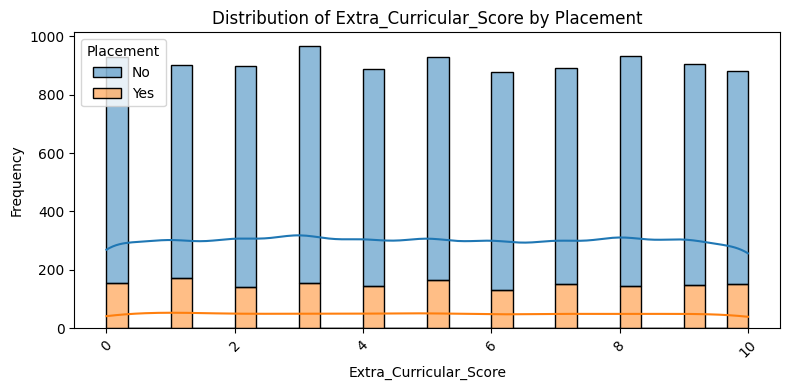


🔢 Value counts for 'Communication_Skills':
Communication_Skills
1      980
2     1008
3      955
4     1017
5      995
6      942
7      984
8     1000
9     1016
10    1103
Name: count, dtype: int64


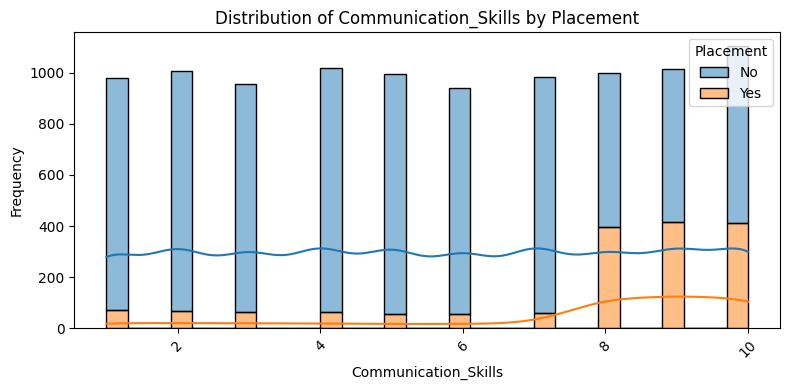


🔢 Value counts for 'Projects_Completed':
Projects_Completed
0    1688
1    1609
2    1681
3    1627
4    1693
5    1702
Name: count, dtype: int64


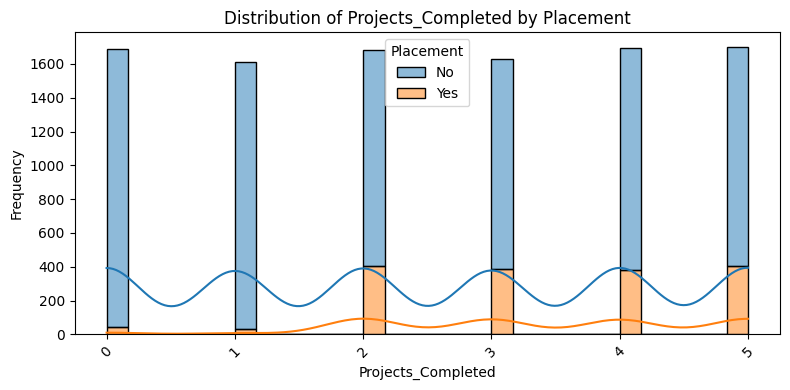

In [10]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in num_cols:
    print(f"\n🔢 Value counts for '{col}':")
    
    if df[col].dtype == 'float64':
        print(df[col].round(2).value_counts().sort_index())
    else:
        print(df[col].value_counts().sort_index())
    
    plt.figure(figsize=(8, 4))
    sns.histplot(data=df, x=col, kde=True, bins=30, hue='Placement', multiple='stack')
    plt.title(f'Distribution of {col} by Placement')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

By compairing numerical columns with placement ,High IQ, high prev-sem-result ,high CGPA, high communication Skills and more project completed skills increases the chances of placements but its not necessary ones 

### Categorical Data

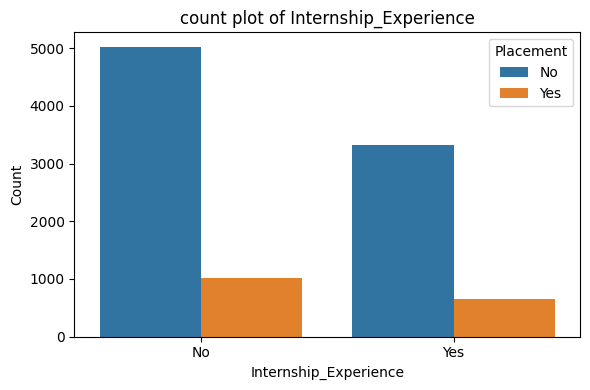

In [11]:
df['Internship_Experience'].value_counts()
plt.figure(figsize=(6, 4))
sns.countplot(x='Internship_Experience', data=df, hue='Placement')
plt.title('count plot of Internship_Experience' )
plt.xlabel('Internship_Experience')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

internship experience is not a necessary criteria for cambus placement

# Predictive Models

## Categorical Encoding

In [12]:
encoder= OrdinalEncoder()
df['Internship_Experience']=encoder.fit_transform(df[['Internship_Experience']])

## Define Predictors and Target values

In [13]:
X = df.drop(columns=['College_ID','Placement'])
y=df['Placement']

## Split Data in Train, Test and Validation Set

In [14]:
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2,random_state=10)

## RandomForestClassifier

In [15]:
model=RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

In [16]:
y_pred=model.predict(X_test)
accuracy_score(y_test,y_pred)

1.0

In [17]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[1652,    0],
       [   0,  348]])

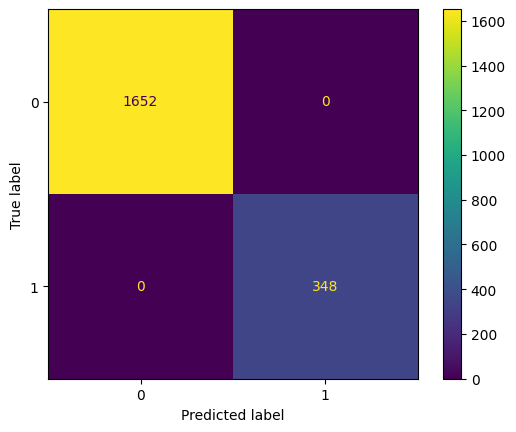

In [18]:
disp=ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()